<h1>Exploratory Data Analysis</h1, style="font-size:20px; color:blue;">

<h2> Roles to Explore: </h2>


In [2]:
#Importing required libraries
import ast
import pandas as pd
import numpy as np
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

#Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()



#Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\maheb\anaconda3\envs\python_data_project\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


<h1>Filter for USA data analyst roles</h1, style="font-size:20px; color:blue;">



In [3]:
df_USA_DA = df[(df['job_country'] == 'United States') & (df['job_title_short'] == 'Data Analyst')]

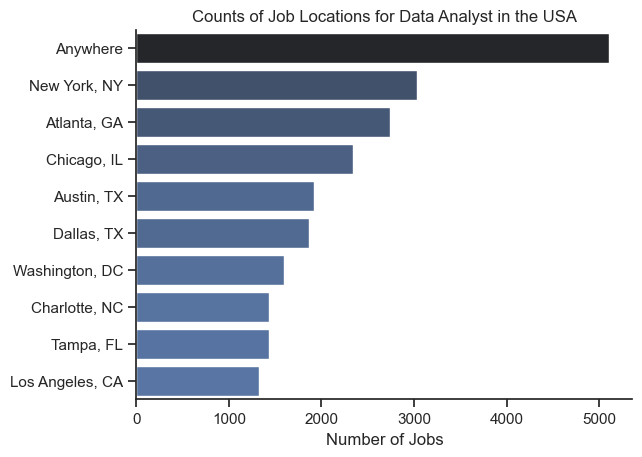

In [4]:
df_plot = df_USA_DA['job_location'].value_counts().head(10).to_frame()
sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='job_location', hue='count', palette='dark:b_r',legend=False)
sns.despine()
plt.title('Counts of Job Locations for Data Analyst in the USA')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

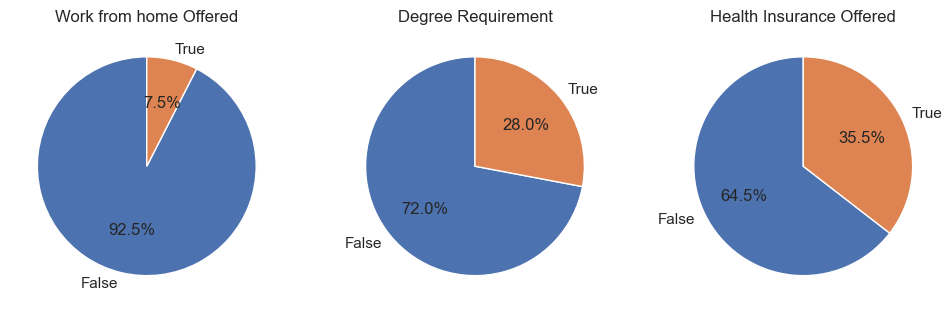

In [5]:
dict_1 = {'job_work_from_home': 'Work from home Offered',
        'job_no_degree_mention': 'Degree Requirement',
        'job_health_insurance': 'Health Insurance Offered'}

fig, ax = plt.subplots(1,3)
fig.set_size_inches((12,5))

for i, (column, title) in enumerate(dict_1.items()):
    ax[i].pie(df_USA_DA[column].value_counts(),startangle=90,autopct=('%1.1f%%'), labels=['False', 'True'])
    ax[i].set_title(title)

plt.show()

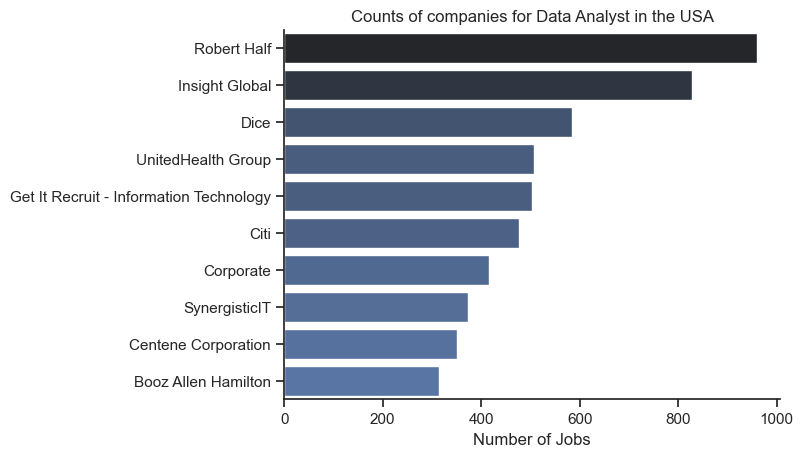

In [6]:
df_plot = df_USA_DA['company_name'].value_counts().head(10).to_frame()
sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='company_name', hue='count', palette='dark:b_r',legend=False)
sns.despine()
plt.title('Counts of companies for Data Analyst in the USA')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()